In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
folder = '/content/drive/My Drive/chess2fenNew/data'
image_size = (128, 128)
batch_size = 32

In [4]:
from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#         rotation_range=5,
#         # width_shift_range=0.1,
#         # height_shift_range=0.1,
#         rescale=1./255,
#         # horizontal_flip=True,
#         # vertical_flip=True,
#         fill_mode='nearest')

# test_datagen = ImageDataGenerator(rescale=1./255)
train_gen = tf.keras.utils.image_dataset_from_directory(
  folder,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=image_size,
  batch_size=batch_size)

Found 2704 files belonging to 13 classes.
Using 2164 files for training.


In [5]:
test_gen = tf.keras.utils.image_dataset_from_directory(
  folder,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=image_size,
  batch_size=batch_size,)

Found 2704 files belonging to 13 classes.
Using 540 files for validation.


In [7]:
from keras.applications.vgg16 import VGG16
from keras.applications.imagenet_utils import decode_predictions

model = VGG16(weights='imagenet')
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Model
from tensorflow.keras import regularizers

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3)) 
 
# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False    

# Establish new fully connected block
x = base_model.output
x = Flatten()(x)  # flatten from convolution tensor output  
# number of layers and units are hyperparameters, as usual
x = Dense(750, activation='relu', kernel_regularizer=regularizers.L1(1e-3),bias_regularizer=regularizers.L1(1e-3))(x) # number of layers and units are hyperparameters, as usual
x = Dropout(0.3)(x)
x = Dense(750, activation='relu', kernel_regularizer=regularizers.L1(1e-3),bias_regularizer=regularizers.L1(1e-3))(x)
x = Dropout(0.3)(x)
# x = Dense(1000, activation='relu')(x)
# x = Dropout(0.6)(x)
# x = Dense(750, activation='relu')(x)
# x = Dropout(0.6)(x)
# x = Dense(500, activation='relu')(x)
# x = Dropout(0.6)(x)
predictions = Dense(13)(x)
# predictions = Dense(13, activation='softmax')(x) # should match # of classes predicted

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [12]:
epochs = 80

history = model.fit(
    train_gen, 
    epochs=epochs,
    verbose = 1,
    validation_data=test_gen
    )
dir = '/content/drive/My Drive/chess2fenNew/model'

model.save_weights('/content/drive/My Drive/chess2fenNew/modelfinal.h5',save_format='h5')
model.save(dir)

Epoch 1/80
68/68 [==============================] - 7s 87ms/step - loss: 53.8304 - accuracy: 0.3900 - val_loss: 33.2066 - val_accuracy: 0.6148
Epoch 2/80
68/68 [==============================] - 6s 86ms/step - loss: 27.9494 - accuracy: 0.5855 - val_loss: 23.1618 - val_accuracy: 0.6722
Epoch 3/80
68/68 [==============================] - 6s 80ms/step - loss: 20.2455 - accuracy: 0.6793 - val_loss: 17.4925 - val_accuracy: 0.7426
Epoch 4/80
68/68 [==============================] - 6s 86ms/step - loss: 15.7716 - accuracy: 0.7204 - val_loss: 13.9735 - val_accuracy: 0.7370
Epoch 5/80
68/68 [==============================] - 6s 83ms/step - loss: 12.7947 - accuracy: 0.7537 - val_loss: 11.6241 - val_accuracy: 0.7407
Epoch 6/80
68/68 [==============================] - 6s 86ms/step - loss: 10.7178 - accuracy: 0.7477 - val_loss: 9.8554 - val_accuracy: 0.7741
Epoch 7/80
68/68 [==============================] - 6s 80ms/step - loss: 9.0156 - accuracy: 0.7962 - val_loss: 8.5115 - val_accuracy: 0.7519
Ep

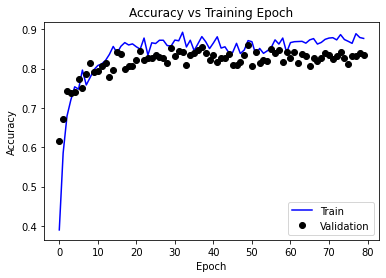

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd

# history_dict = history.history
# history_dict.keys()

plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['val_accuracy'], 'ko')

plt.title('Accuracy vs Training Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation']);

In [14]:
class_names = test_gen.class_names

T = []
images = []
P = []
for images,labels in test_gen:
  y = model.predict(images, verbose=2)
  y = np.argmax(y,axis=1).tolist()
  y_t = labels.numpy().tolist()
  T = T + y_t
  P = P + y
  
# get predictions
newY = []
for i in P:
  newY.append(class_names[i])

newYT = []
for i in T:
  newYT.append(class_names[i])

print(newY)
print(newYT)

# compute confusion matrix with `tf` 
confusion = tf.math.confusion_matrix(
              labels = T,      # get trule labels 
              predictions = P,  # get predicted labels 
              num_classes=13)

1/1 - 0s - 165ms/epoch - 165ms/step
1/1 - 0s - 17ms/epoch - 17ms/step
1/1 - 0s - 22ms/epoch - 22ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 22ms/epoch - 22ms/step
1/1 - 0s - 17ms/epoch - 17ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 34ms/epoch - 34ms/step
1/1 - 0s - 17ms/epoch - 17ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 17ms/epoch - 17ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 124ms/epoch - 124ms/step
['BP', 'BQ', 'WB', 'EMPTY', 'BB', 'WQ', 'BP', 'WK', 'EMPTY', 'BQ', 'BR', 'WB', 'WP', 'WB', 'BP', 'WR', 'BR', 'EMPTY', 'BP', 'WN', 'WN', 'BK', 'BN', 'BB', 'BR', 'BQ', 'BN', 'BK', 'BQ', 'WB', 'WQ', 'BN', 'WP', 'BN', 'WK', 'WQ', 'WQ', 'WN', 'WB', 'EMPTY', 'BR', 'BB', 'BQ', 'BN', 'BK', 'BR', 'WP', 'BR', 'WQ', 'BR', 'WP', 'BN', 'BQ', 'EMPTY', 'WN', 'WK', 'BR', 'BN', 'EMPTY', 'BN', 'EMPTY', 'BN', 'WQ', 'BQ', 'BR', 'BP', 

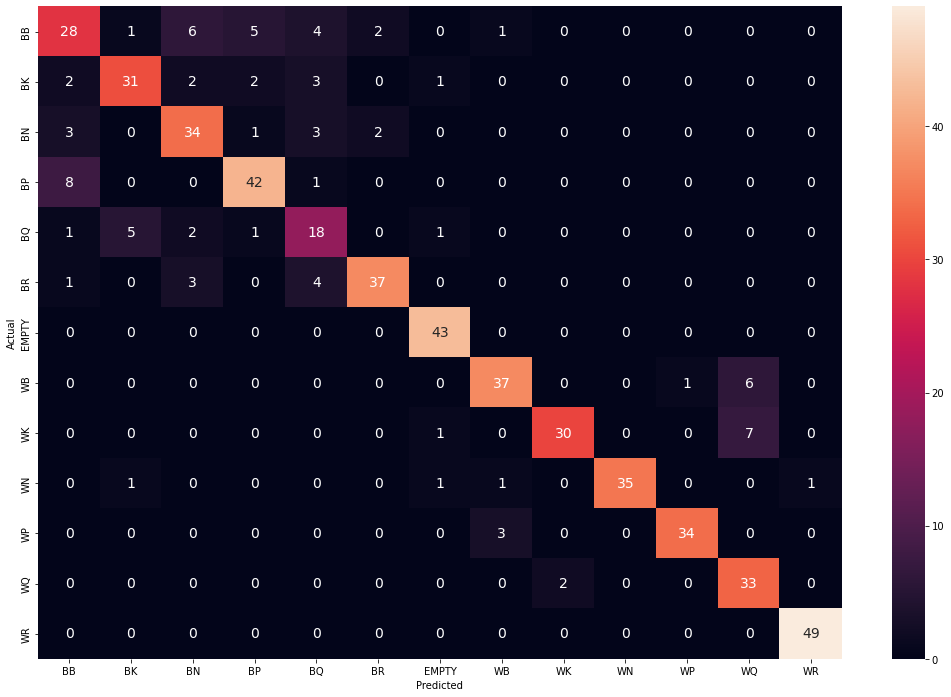

In [15]:
import seaborn as sns 
import pandas as pd 

cm = pd.DataFrame(confusion.numpy(), # use .numpy(), because now confusion is tensor
               class_names,class_names)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (18,12))
sns.heatmap(cm, annot=True, annot_kws={"size": 14}) # font size
plt.show()